In [ ]:
import torch
import torch.optim as optim
from torchvision.transforms import transforms
import numpy as np
from utils import *
from gan import GAN



> In this short notebook i want to test GAN model implementation correctness. </br>
> To do this i'll train model on cosine dataset and generate points that will form cosine graph.


In [ ]:
x_cos = torch.Tensor(2*np.pi*np.random.rand(5000))
y_cos = torch.Tensor(np.cos(x_cos))
xy_cos = torch.transpose(torch.vstack((x_cos, y_cos)), 0, 1)

cos_dataset = [(point, label) for point, label in zip(xy_cos, torch.ones(1000, 1))]
cos_loader = torch.utils.data.DataLoader(cos_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
cos_gan = GAN(data_dimension=2, latent_dimension=8, discriminator_size=(256, 128, 64),
              generator_size=(16, 32), dropout=0, batch_norm=False)

layers = [layer for layer in list(cos_gan.generator.children())][0]
cos_gan.generator = torch.nn.Sequential(*layers[:-1]) # Deleting tanh layer

criterion = nn.BCELoss()

discr_optim = optim.Adam(cos_gan.discriminator.parameters(), lr=1e-3)
gene_optim = optim.Adam(cos_gan.generator.parameters(), lr=1e-3)

epochs = 500
k = 1

device = get_device()
cos_gan = cos_gan.to(device)

In [ ]:
for epoch in range(epochs):
  
  discr_epoch_loss, gene_epoch_loss = train_gan(cos_gan, discr_optim, gene_optim, criterion, cos_loader)
  
  if (epoch+1) % 100 == 0:
    print("Loss in epoch: ", (epoch+1))
    print("Discriminator: ", np.mean(discr_epoch_loss))
    print("Generator: ", np.mean(gene_epoch_loss))    

Loss in epoch:  100
Discriminator:  1.046181472018361
Generator:  0.5601336443796754
Loss in epoch:  200
Discriminator:  1.0881054140627384
Generator:  0.5333443498238921
Loss in epoch:  300
Discriminator:  1.3405879102647305
Generator:  0.5803671516478062
Loss in epoch:  400
Discriminator:  0.9999624155461788
Generator:  0.4569789385423064
Loss in epoch:  500
Discriminator:  1.2555582970380783
Generator:  0.598347800783813


> Let's generate some data points, and plot them.

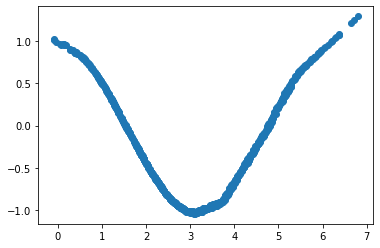

In [ ]:
cos_gan.cpu()

gen_cos = cos_gan.generate(1000).detach()

plt.scatter(gen_cos[:, 0], gen_cos[:, 1])

> We can see that model approximate cosine graph accurately.